# Detection des visages

Une fois le visage est détecté, nous nous intéressons à le reconnaître. Dans cette section nous supposons qu’on dispose d’images de visages (c.a.d la phase de détection a été déjà réalisée). L’objectif est de reconnaître l’identité de chaque visage. Nous allons explorer des approches classiques et des approches CNN

Pour cette partie voila la liste des site que l'on c'est inspiré pour la réalisation de ce projet:
- [Face Detection CNN](https://www.kaggle.com/code/nurcankurt/face-detection-cnn)
- [Détection de Masque Visage utilisant CNN (98% Précision)](https://www.kaggle.com/code/arbazkhan971/face-mask-detection-using-cnn-98-accuracy)
- [face-mask-detection CNN](https://www.kaggle.com/code/abdalrahmanshahrour/face-mask-detection-cnn/notebook)
- [Face detection using CNN with the LFW dataset](https://www.kaggle.com/code/jake126/face-detection-using-cnn-with-the-lfw-dataset)
- [Image Recognition - Gender Detection](https://www.kaggle.com/code/bmarcos/image-recognition-gender-detection-inceptionv3)
- [Face-Detection-Dataset](https://www.kaggle.com/datasets/fareselmenshawii/face-detection-dataset?resource=download-directory)

In [12]:
# bibliotheque utiliser pour les expressions regulieres
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
import random
import seaborn as sns
import cv2

Evitons d'entrainer nos ia sur un dataset ou il y a une grande mojorité de visage d'une seul personne pour éviter le biais de l'ia.
De ce fait nous observons d'abord le datatset et nous le nettoyons pour avoir un dataset équilibré.


In [13]:
# Charger les données de visage LFW
lfw_dataset = fetch_lfw_people(min_faces_per_person=50)
X = lfw_dataset.data
y = lfw_dataset.target
target_names = lfw_dataset.target_names

(639, 2914)
['George W Bush' 'Gerhard Schroeder']


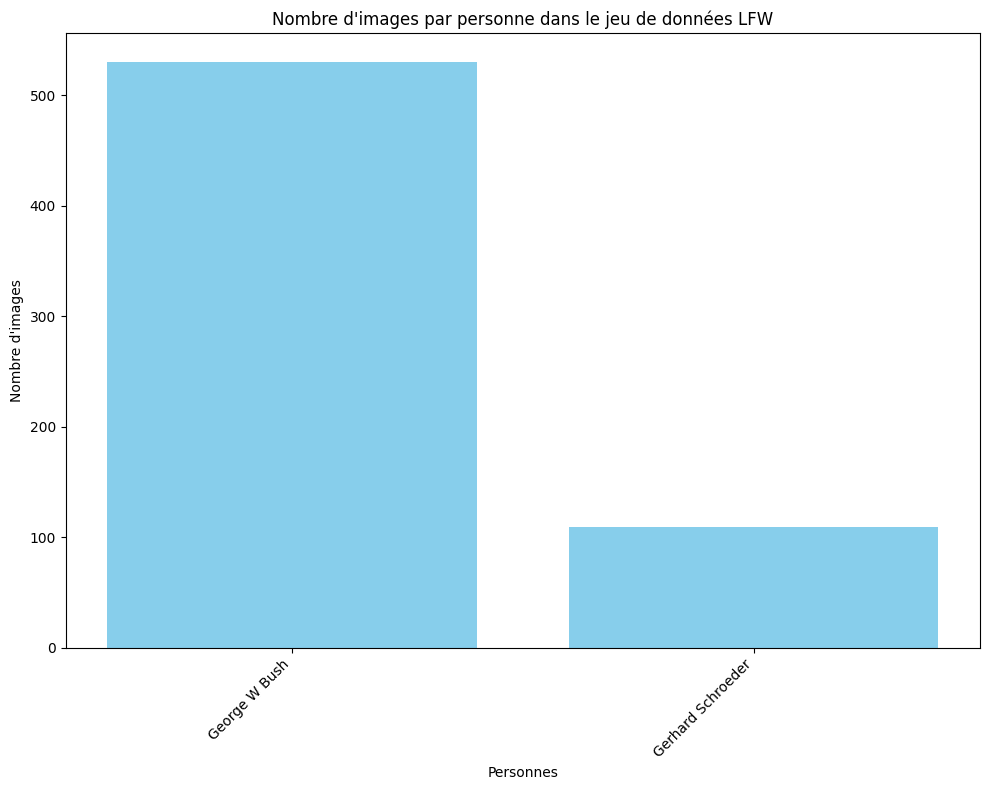

In [14]:
# Affichage de la taille des données
print(X.shape)
print(target_names)

import matplotlib.pyplot as plt
import numpy as np

# Compter le nombre d'occurrences de chaque cible
counts = np.bincount(y)

# Créer le graphique à barres
plt.figure(figsize=(10, 8))
plt.bar(target_names, counts, color='skyblue')
plt.xlabel('Personnes')
plt.ylabel('Nombre d\'images')
plt.title('Nombre d\'images par personne dans le jeu de données LFW')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

On remarque que le dataset est déséquilibré, il y a une grande majorité de visage d'une seule personne. Nous allons donc équilibrer le dataset en supprimant les visages de la personne qui apparaît le plus de fois.

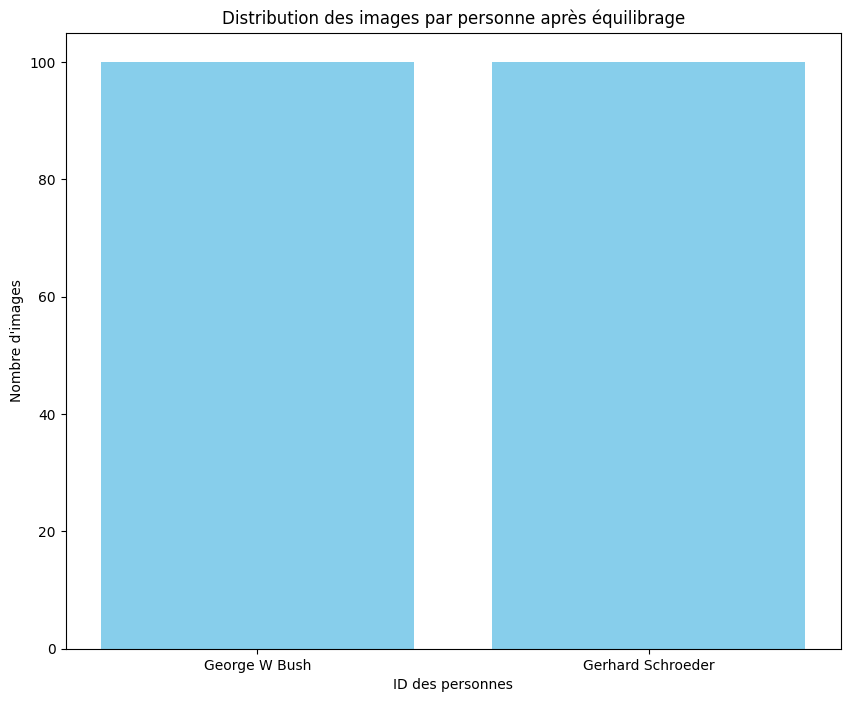

In [15]:
import numpy as np

# Initialiser les listes pour stocker les données ajustées
X_ajuste = []
y_ajuste = []

# Identifier toutes les personnes uniques
personnes_uniques = np.unique(y)

# Pour chaque personne, ajuster le nombre d'images
for personne in personnes_uniques:
    indices = np.where(y == personne)[0]
    if len(indices) > 100:
        indices = indices[:100]  # Limiter à 100 images si plus disponible
    X_ajuste.append(X[indices])
    y_ajuste.append(y[indices])

# Combiner les données ajustées
X_ajuste = np.concatenate(X_ajuste, axis=0)
y_ajuste = np.concatenate(y_ajuste, axis=0)

# Vérifier la nouvelle distribution des classes
nouvelles_counts = np.bincount(y_ajuste)
plt.figure(figsize=(10, 8))
plt.bar(target_names, nouvelles_counts, color='skyblue')
plt.xlabel('ID des personnes')
plt.ylabel('Nombre d\'images')
plt.title('Distribution des images par personne après équilibrage')
plt.show()

# Mettre à jour X et y avec les données ajustées
X = X_ajuste
y = y_ajuste

## CNN

Ecrire un programme Python permettant de reconnaitre un visage en utilisant une architecture CNN


In [19]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Redimensionner les données pour les adapter à l'entrée du CNN
X_train_cnn = X_train.reshape(-1, 62, 47, 1)
X_test_cnn = X_test.reshape(-1, 62, 47, 1)

# Créer un modèle CNN simple
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(62, 47, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(7, activation='softmax')
])

# Compiler le modèle
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

epochs = 100

# Entraîner le modèle
historique = model.fit(X_train_cnn, y_train, epochs=epochs, batch_size=64, validation_split=0.1)

# Évaluer le modèle
test_loss, test_acc = model.evaluate(X_test_cnn, y_test)
print(f'Précision du modèle CNN: {test_acc}')

Epoch 1/100


c:\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 112ms/step - accuracy: 0.1586 - loss: 1.9178 - val_accuracy: 0.5000 - val_loss: 1.5656
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.4421 - loss: 1.5327 - val_accuracy: 0.5000 - val_loss: 1.0732
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.4370 - loss: 1.2298 - val_accuracy: 0.5000 - val_loss: 0.7478
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.4053 - loss: 1.2986 - val_accuracy: 0.5000 - val_loss: 0.7312
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.4210 - loss: 1.1102 - val_accuracy: 0.5000 - val_loss: 0.7724
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.4739 - loss: 1.0569 - val_accuracy: 0.5000 - val_loss: 0.8053
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.4108 - loss: 1.1557 - val_accuracy: 0.6429 - val_loss: 0.8278
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.4840 - loss: 1.0867 - val_accuracy: 0.5000 - val_loss: 0.7867
Epo

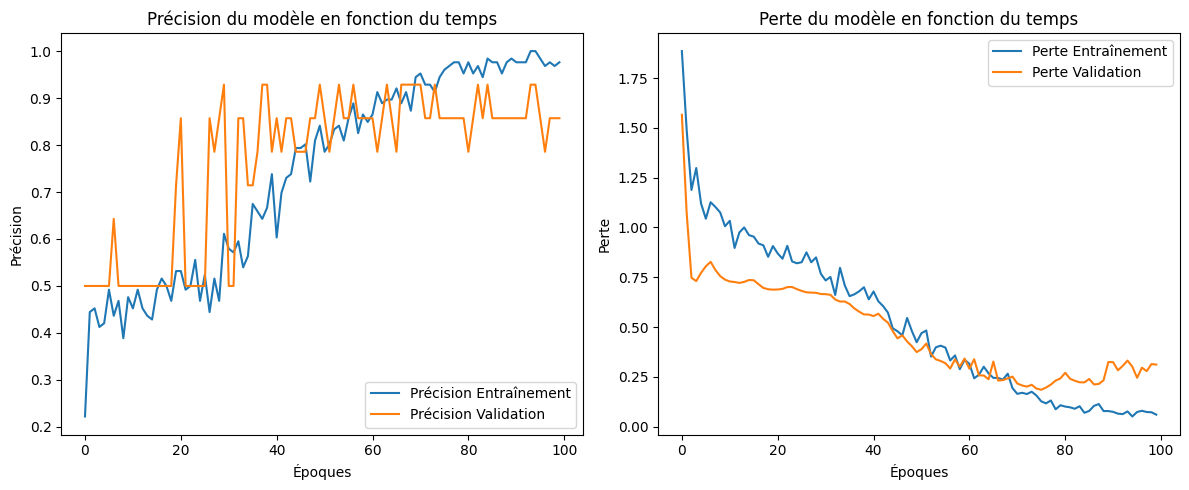

In [20]:
import matplotlib.pyplot as plt

# Tracer la précision d'entraînement et de validation
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(historique.history['accuracy'], label='Précision Entraînement')
plt.plot(historique.history['val_accuracy'], label='Précision Validation')
plt.title('Précision du modèle en fonction du temps')
plt.xlabel('Époques')
plt.ylabel('Précision')
plt.legend()

# Tracer la perte d'entraînement et de validation
plt.subplot(1, 2, 2)
plt.plot(historique.history['loss'], label='Perte Entraînement')
plt.plot(historique.history['val_loss'], label='Perte Validation')
plt.title('Perte du modèle en fonction du temps')
plt.xlabel('Époques')
plt.ylabel('Perte')
plt.legend()

plt.tight_layout()
plt.show()


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Classification Report for CNN:
                   precision    recall  f1-score   support

    George W Bush       0.96      0.71      0.81        31
Gerhard Schroeder       0.76      0.97      0.85        29

         accuracy                           0.83        60
        macro avg       0.86      0.84      0.83        60
     weighted avg       0.86      0.83      0.83        60



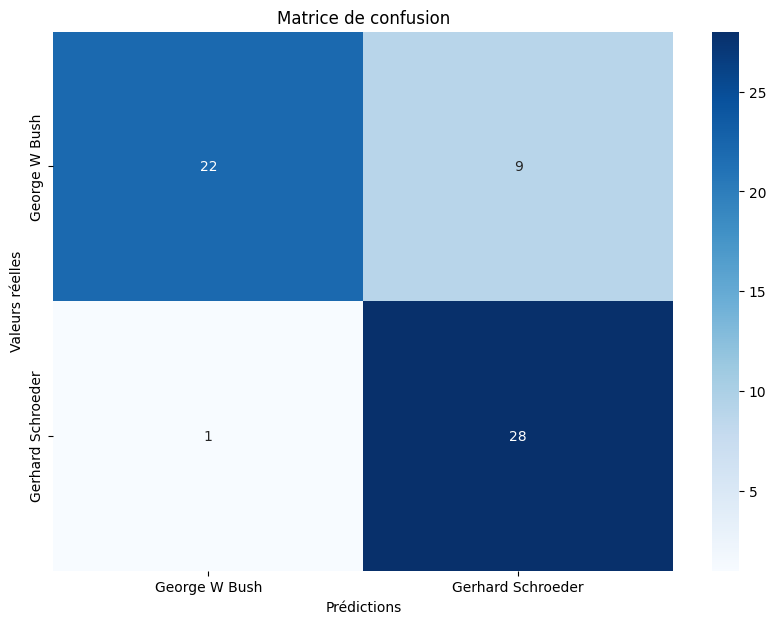

In [21]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np

# Prédire les étiquettes pour l'ensemble de test
y_pred = model.predict(X_test_cnn)
y_pred_classes = np.argmax(y_pred, axis=1)

# Affichage du classification report
print("Classification Report for CNN:")
print(classification_report(y_test, y_pred_classes, target_names=target_names))

# Calculer la matrice de confusion
mat_conf = confusion_matrix(y_test, y_pred_classes)

# Afficher la matrice de confusion
plt.figure(figsize=(10, 7))
sns.heatmap(mat_conf, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.title('Matrice de confusion')
plt.xlabel('Prédictions')
plt.ylabel('Valeurs réelles')
plt.show()